<h3>Implement a Machine Learning Classification model using a K Nearest Neighbors Classifier algorithm and enhance the model by K Fold and GridSearchCV cross-validation</h3>
<h5>Name : Shubham Sonake</h5>
<h5>Reg No : 2021BIT047</h5>

<h5>Importing the required libraries</h5>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

<h4>Importing the Dataset</h4>

In [3]:
data = pd.read_csv(r"tennis.csv")

<h5>Data Preprocessing</h5>

In [4]:
data.describe()

,outlook,temp,humidity,windy,play
count,14,14,14,14,14
unique,3,3,2,2,2
top,sunny,mild,high,False,yes
freq,5,6,7,8,9


In [5]:
data

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


In [7]:
data.describe

<bound method NDFrame.describe of      outlook  temp humidity  windy play
0      sunny   hot     high  False   no
1      sunny   hot     high   True   no
2   overcast   hot     high  False  yes
3      rainy  mild     high  False  yes
4      rainy  cool   normal  False  yes
5      rainy  cool   normal   True   no
6   overcast  cool   normal   True  yes
7      sunny  mild     high  False   no
8      sunny  cool   normal  False  yes
9      rainy  mild   normal  False  yes
10     sunny  mild   normal   True  yes
11  overcast  mild     high   True  yes
12  overcast   hot   normal  False  yes
13     rainy  mild     high   True   no>

<h4>Identify Missing Values</h4>

In [6]:
data.isnull().sum()

outlook     0
temp        0
humidity    0
windy       0
play        0
dtype: int64

<h4> converting 'categorical' data in the dataset into 'numerical' representations using label encoding</h4>
<h5>encoding converts categorical data into numerical format to make it compatible with machine learning algorithms that require numerical inputs</h5>

In [9]:
from sklearn import preprocessing
string_to_int= preprocessing.LabelEncoder()
newdata=data.apply(string_to_int.fit_transform) 

In [10]:
newdata

,outlook,temp,humidity,windy,play
0,2,1,0,0,0
1,2,1,0,1,0
2,0,1,0,0,1
3,1,2,0,0,1
4,1,0,1,0,1
5,1,0,1,1,0
6,0,0,1,1,1
7,2,2,0,0,0
8,2,0,1,0,1
9,1,2,1,0,1


<h5>Define the features and variables</h5>

In [11]:
X = newdata.drop('play', axis=1)  
y = newdata['play']

<h5>Split the features and target variables</h5>

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=42)

<h5>Train the model</h5>

In [13]:
tree_model = DecisionTreeClassifier()
tree_model = tree_model.fit(X_train,y_train)
tree_model

DecisionTreeClassifier()

<h5>Predict the model</h5>

In [14]:
y_pred = tree_model.predict(X_test)
y_pred

array([1, 1, 0])

In [15]:
features=X.columns
features

Index(['outlook', 'temp', 'humidity', 'windy'], dtype='object')

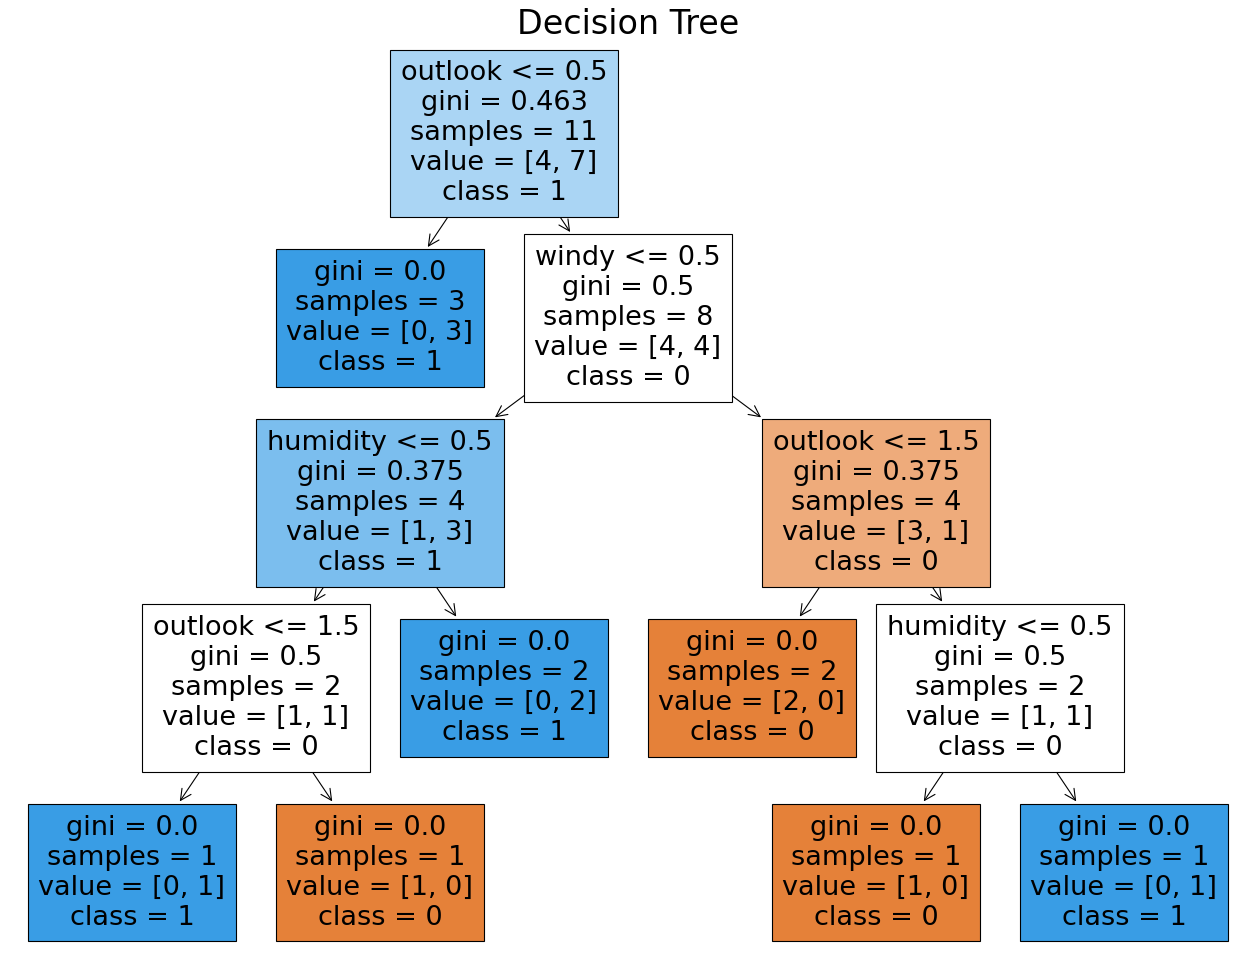

In [17]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,15),dpi= 80)
class_labels = ['Negative', 'Positive']
plot_tree(tree_model, filled=True, feature_names=list(features), class_names=['0', '1'])
plt.title("Decision Tree",fontsize=30)
plt.show()

<h5>Evaluating the above classification</h5>

In [18]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test,y_pred)

In [21]:
print("Confusion Matrix")
print(conf_matrix)

Confusion Matrix
[[1 0]
 [0 2]]


In [22]:
from sklearn.metrics import precision_score ,f1_score ,accuracy_score ,recall_score
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [23]:
print("Accuracy is",acc)
print("Precision is",prec)
print("Recall is",rec)
print("F1 score is",f1)

Accuracy is 1.0
Precision is 1.0
Recall is 1.0
F1 score is 1.0


<h5>Classification Report</h5>>

In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



<h4>Enhancing the model with K fold Cross validation</h4>

In [25]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [26]:
Kn_model = KNeighborsClassifier() 
kfold = KFold(n_splits=5)
results = cross_val_score(Kn_model, X, y, cv=kfold)

In [27]:
print(results)

[0.66666667 0.33333333 0.33333333 0.33333333 0.5       ]


In [28]:
print(results.mean())

0.4333333333333333


<h4>Enhancing the model with GridSearch Cross validation</h4>

In [29]:
from sklearn.model_selection import GridSearchCV

In [30]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
}

In [31]:
grid = GridSearchCV(tree_model, param_grid, cv=3)
grid.fit(X, y)
grid

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'splitter': ['best', 'random']})

<h5>Results</h5>

In [32]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.7833333333333333
{'criterion': 'gini', 'splitter': 'best'}
DecisionTreeClassifier()
